# Random Forest

### Random Forest is an **ensemble learning technique** that constructs a multitude of decision trees during training and combines their predictions to produce a final output.

### How to predict
1. Regression : mean of each dicision tree's output
2. Classification : majority vote of each dicision tree

### Advantages
- **Reduces Overfitting**: By averaging multiple trees, Random Forest lowers the risk of overfitting, leading to more generalizable models.
- **Robustness**: It's less sensitive to noise in the data and works well with large datasets and high-dimensional spaces.

In [269]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
data = pd.read_csv("../data/car.csv")

In [271]:
data.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [273]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

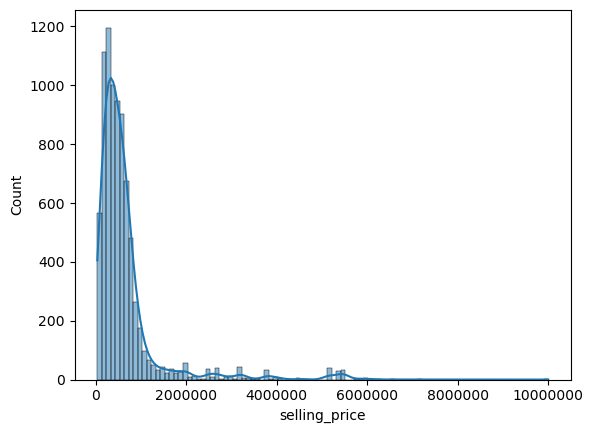

In [274]:
sns.histplot(data['selling_price'], bins=100, kde=True)
plt.ticklabel_format(style='plain', axis='both')
plt.show()

In [275]:
data.engine

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8128, dtype: object

In [276]:
data['engine'] = data['engine'].str.split(expand=True)[0] # Pandas DataFrame

In [277]:
data['engine'] = pd.to_numeric(data['engine']) # object -> float

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   float64
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 825.6+ KB


In [279]:
data.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0


In [280]:
data[['max_power', 'max_power_unit']] = data['max_power'].str.split(expand=True)

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            8128 non-null   object 
 1   year            8128 non-null   int64  
 2   selling_price   8128 non-null   int64  
 3   km_driven       8128 non-null   int64  
 4   fuel            8128 non-null   object 
 5   seller_type     8128 non-null   object 
 6   transmission    8128 non-null   object 
 7   owner           8128 non-null   object 
 8   mileage         7907 non-null   object 
 9   engine          7907 non-null   float64
 10  max_power       7913 non-null   object 
 11  torque          7906 non-null   object 
 12  seats           7907 non-null   float64
 13  max_power_unit  7906 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 889.1+ KB


In [288]:
# floating
data['max_power'] = pd.to_numeric(data['max_power'])
data['max_power'].astype('float64')

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8128, dtype: float64

In [285]:
data[data['max_power'] == 'bhp']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796.0,bhp,NaN,8.0,None


In [286]:
data['max_power'].replace('bhp', np.nan, inplace=True)

In [287]:
data[data['max_power'] == 'bhp']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit


In [289]:
data['max_power'] = pd.to_numeric(data['max_power'])
data['max_power'].astype('float64')

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8128, dtype: float64

In [290]:
data['max_power_unit'].nunique()

1

- Different type of units

In [291]:
data['mileage'].str.split(expand=True)[1].unique() # 2 type of mileage
data['mileage'] = data['mileage'].str.split(expand=True)[0].astype('float64')

In [292]:
data['fuel'].unique() # 4 Type of fuel

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [293]:
def mileage(x):
    if x['fuel'] == "Diesel":
        return x['mileage']/80.43
    elif x['fuel'] == "Petrol":
        return x['mileage']/73.56
    elif x['fuel'] == "LPG":
        return x['mileage']/40.85
    else:
        return x['mileage']/44.2

In [294]:
data['mileage'] = data.apply(mileage, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   object 
 2   selling_price  8128 non-null   object 
 3   km_driven      8128 non-null   object 
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        1 non-null      float64
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   object 
dtypes: float64(1), object(12)
memory usage: 825.6+ KB


In [295]:
# torque columns
data['torque'] = data['torque'].str.upper() # convert all value to uppercase

In [296]:
def torque_unit(x):
    if 'NM' in str(x):
        return 'NM'
    elif 'KGM' in str(x):
        return 'KGM'

In [297]:
data['torque_unit'] = data['torque'].apply(torque_unit)

In [298]:
data.torque_unit.unique()

array(['NM', 'KGM', None], dtype=object)

In [299]:
data['torque']

0                  190NM@ 2000RPM
1             250NM@ 1500-2500RPM
2           12.7@ 2,700(KGM@ RPM)
3        22.4 KGM AT 1750-2750RPM
4           11.5@ 4,500(KGM@ RPM)
                  ...            
8123             113.7NM@ 4000RPM
8124    24@ 1,900-2,750(KGM@ RPM)
8125               190NM@ 2000RPM
8126          140NM@ 1800-3000RPM
8127          140NM@ 1800-3000RPM
Name: torque, Length: 8128, dtype: object

In [300]:
data['torque_unit'].fillna('NM', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_32796\1420008375.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['torque_unit'].fillna('NM', inplace=True)


In [301]:
def split_num(x):
    x = str(x)
    for index, value in enumerate(x):
        if value not in '0123456789':
            break
    return x[:index]

In [302]:
data['torque'] = data['torque'].apply(split_num)

In [303]:
data[['torque', 'torque_unit']]

,torque,torque_unit
0,190,NM
1,250,NM
2,12,KGM
3,22,KGM
4,11,KGM
...,...,...
8123,113,NM
8124,24,KGM
8125,190,NM
8126,140,NM


In [ ]:
# data['torque'].astype('float64') -> rasing Error because of missing value
data['torque'].unique()

array(['190', '250', '12', '22', '11', '113', '7', '59', '170', '160',
       '248', '78', '-1', '84', '115', '200', '62', '219', '114', '69',
       '172', '6', '60', '90', '151', '104', '320', '145', '146', '343',
       '400', '138', '360', '380', '173', '111', '112', '130', '205',
       '280', '99', '77', '110', '153', '101', '290', '120', '96', '135',
       '259', '91', '109', '202', '430', '347', '382', '620', '500',
       '550', '490', '177', '300', '260', '213', '224', '640', '95', '13',
       '71', '14', '117', '72', '140', '134', '150', '340', '240', '330',
       '20', '247', '223', '180', '195', '154', '108', '420', '100', '51',
       '132', '350', '218', '24', '85', '74', '230', '245', '204', '125',
       '102', '8', '106', '144', '142', '196', '9', '209', '220', '48',
       '171', '277', '215', '263', '25', '16', '94', '789', '436', '182',
       '305', '540', '327', '450', '19', '148', '116', '222', '98', '402',
       '210', '32', '197', '136', '470', '123', '510

In [ ]:
# checking why the error is occurred
original = pd.read_csv("../data/car.csv")

In [ ]:
original[original['torque'].isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [305]:
data['torque']

0       190
1       250
2        12
3        22
4        11
       ... 
8123    113
8124     24
8125    190
8126    140
8127    140
Name: torque, Length: 8128, dtype: object

In [308]:
data['torque'].replace('', np.NaN, inplace=True)

In [309]:
data['torque'] = data['torque'].astype('float64')

In [310]:
def torque_trans(x):
    if x['torque_unit'] == 'KGM':
        return x['torque'] * 9.8066
    else:
        return x['torque']

In [311]:
data['torque'] = data.apply(torque_trans, axis=1)

In [314]:
data.drop('torque_unit', axis=1, inplace=True)


In [313]:
data.drop('max_power_unit', axis=1, inplace=True)

In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   float64
 12  seats          7907 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 825.6+ KB


In [325]:
data['name'] = data['name'].str.split(expand=True)[0]

---

# Handling Missing Value

In [333]:
data.isna().mean()

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          0.027190
engine           0.027190
max_power        0.026575
torque           0.027313
seats            0.027190
dtype: float64

In [334]:
len(data)

8128

In [336]:
data.dropna(inplace=True) # delete rows

---

# Convert to Dummy variable(object type data)

In [350]:
data

,year,selling_price,km_driven,transmission,mileage,engine,max_power,torque,seats,name_Ashok,...,name_Volvo,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,Manual,0.290936,1248.0,74.00,190.0000,5.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2014,370000,120000,Manual,0.262837,1498.0,103.52,250.0000,5.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2006,158000,140000,Manual,0.240620,1497.0,78.00,117.6792,5.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2010,225000,127000,Manual,0.285963,1396.0,90.00,215.7452,5.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2007,130000,120000,Manual,0.218869,1298.0,88.20,107.8726,5.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Manual,0.251495,1197.0,82.85,113.0000,5.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8124,2007,135000,119000,Manual,0.208877,1493.0,110.00,235.3584,5.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8125,2009,382000,120000,Manual,0.239960,1248.0,73.90,190.0000,5.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8126,2013,290000,25000,Manual,0.293050,1396.0,70.00,140.0000,5.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [358]:
data = pd.get_dummies(data, columns=['name', 'fuel', 'seller_type', 'owner', transmission], drop_first=True, dtype=float)

---

# Modeling and Estimation

In [355]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('selling_price', axis=1) , data['selling_price'], test_size=0.2, random_state=100)

In [356]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=100)

In [357]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [360]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

In [361]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, train_pred, squared=False)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


18562.47375779573

In [362]:
mean_squared_error(y_test, test_pred, squared=False)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


184102.64097880575

- not easy to visualize in Random Forest

In [364]:
from sklearn.tree import plot_tree

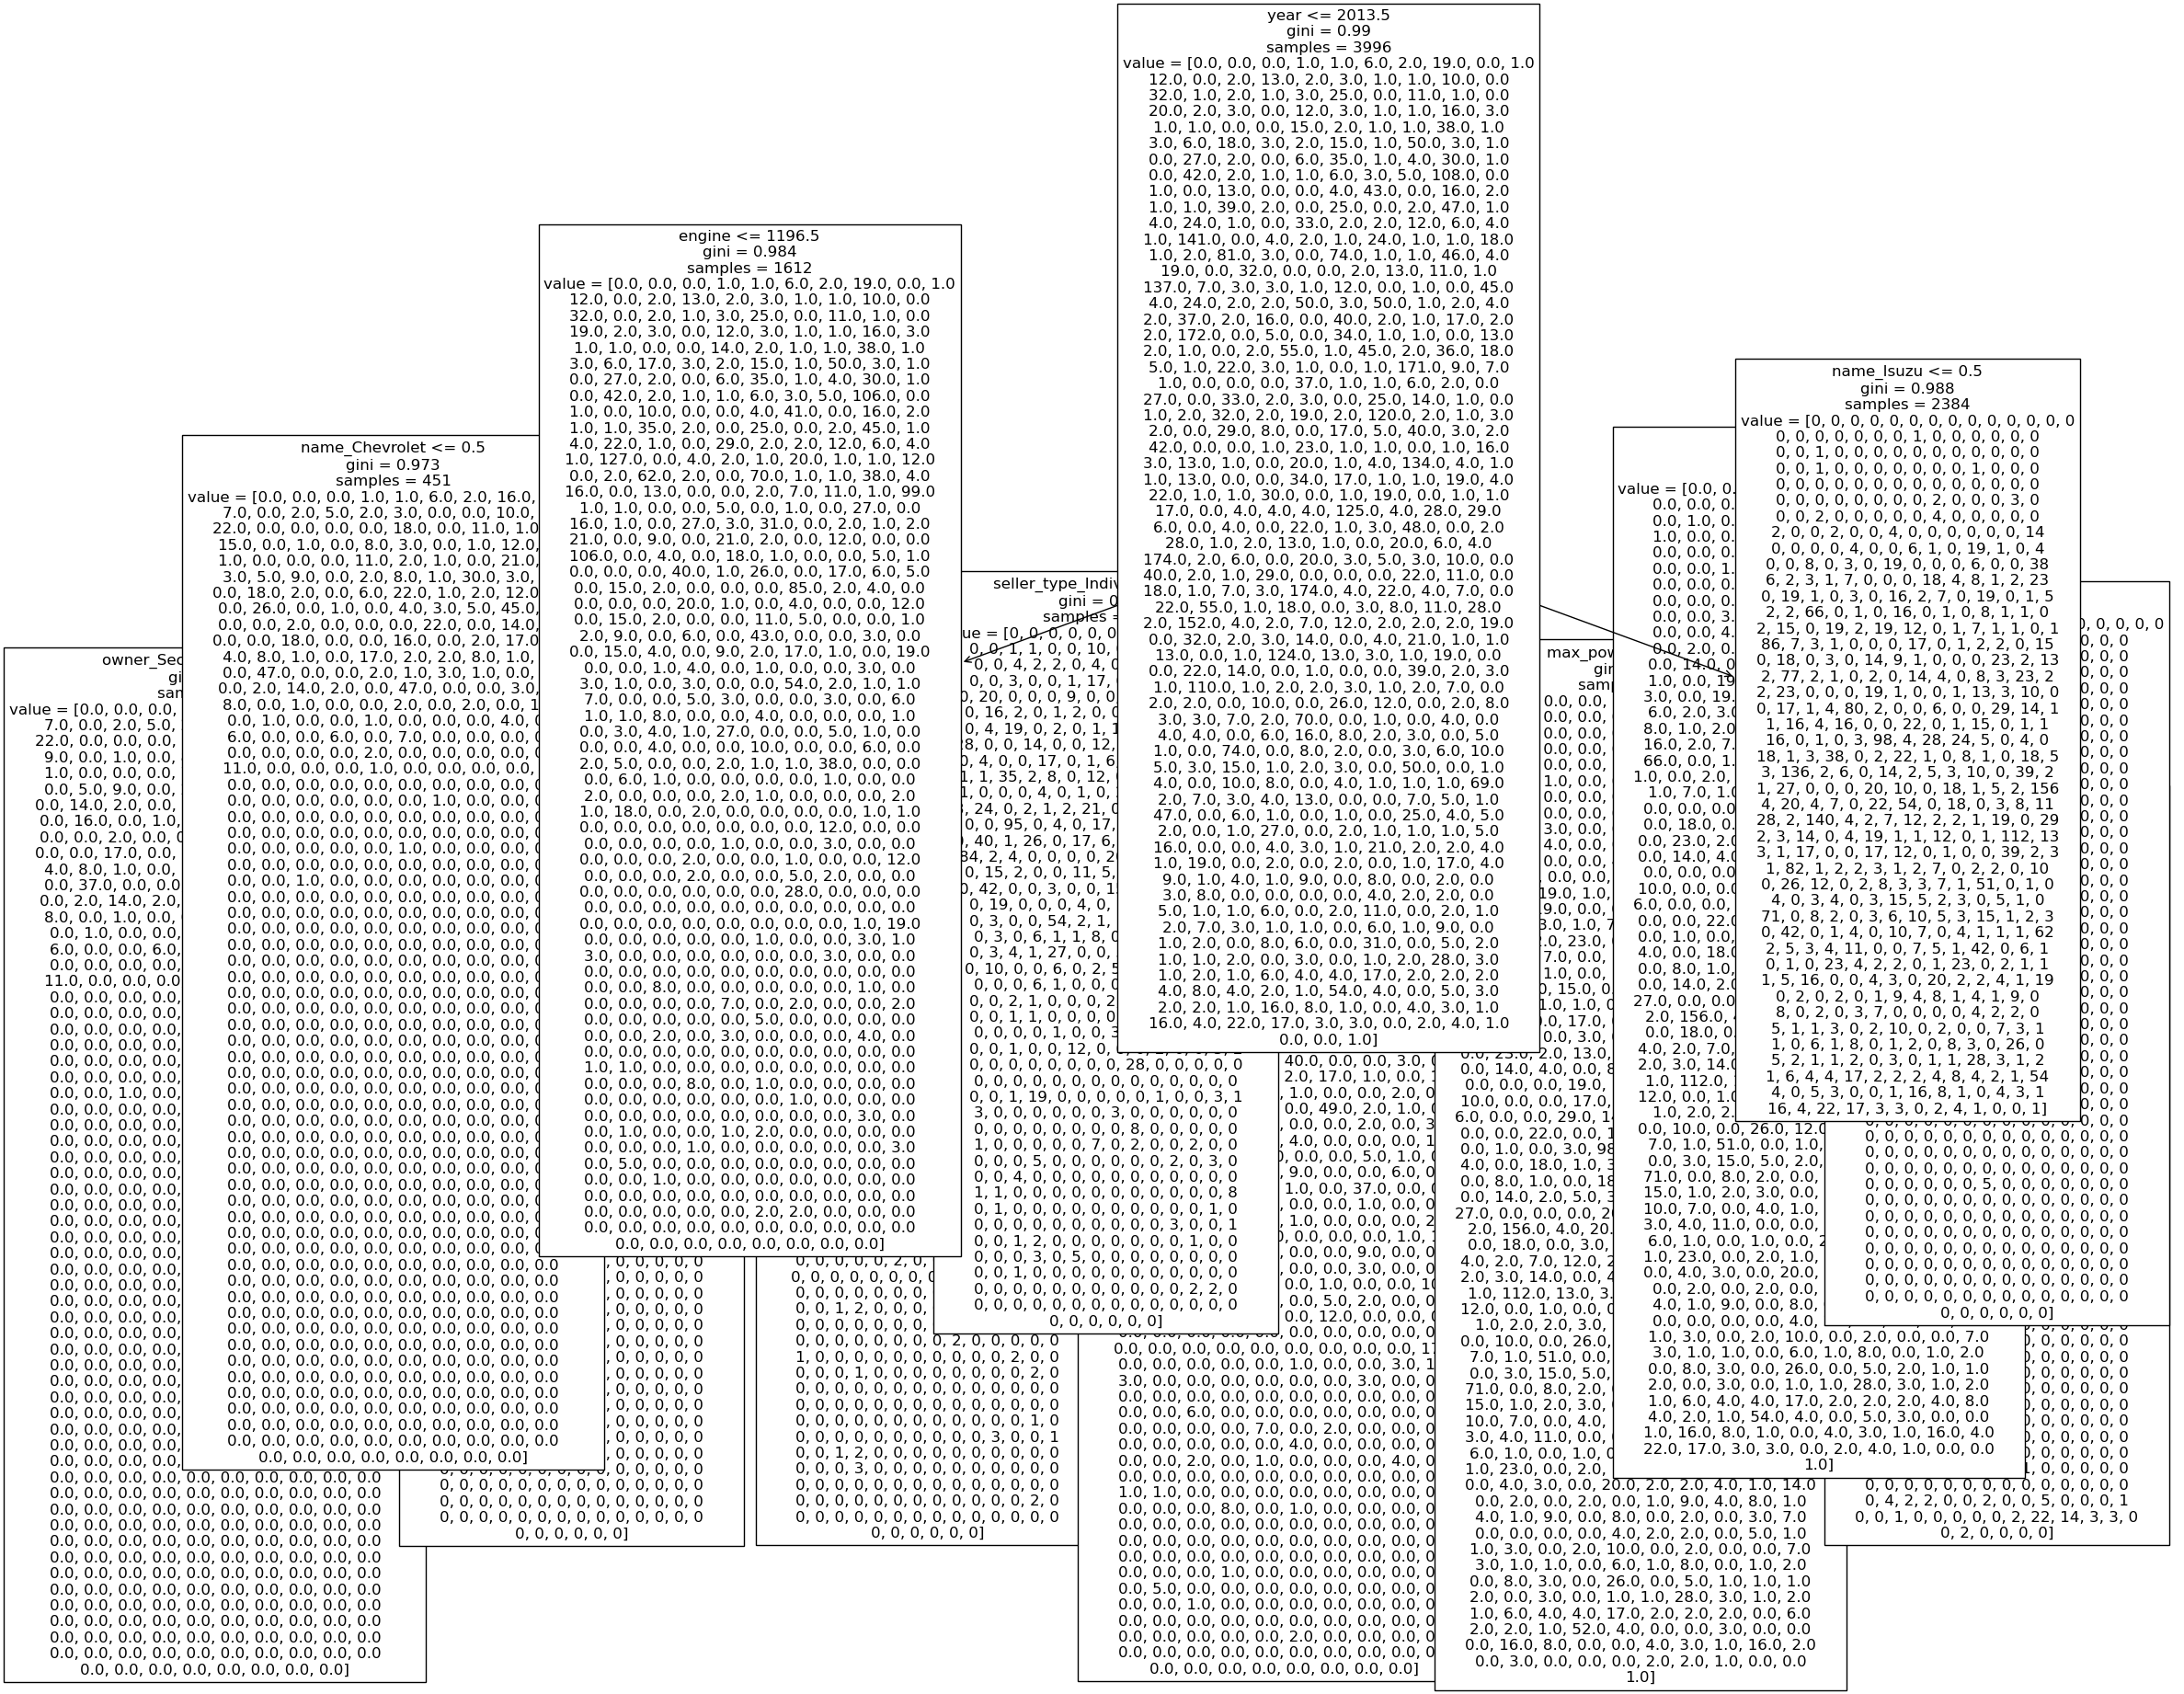

In [368]:
plt.figure(figsize=(30, 15))
plot_tree(rf.estimators_[20], max_depth=3, fontsize=12 , feature_names=X_train.columns)
plt.show()

In [377]:
# important feature in dicision tree 
round(pd.Series(rf.feature_importances_, index=X_train.columns), 2).sort_values(ascending=False)

km_driven                       0.34
year                            0.17
mileage                         0.10
max_power                       0.08
torque                          0.06
owner_Second Owner              0.04
engine                          0.04
seats                           0.02
owner_Third Owner               0.02
seller_type_Individual          0.02
owner_Fourth & Above Owner      0.01
seller_type_Trustmark Dealer    0.01
fuel_Petrol                     0.01
fuel_Diesel                     0.01
name_Toyota                     0.01
name_Tata                       0.01
name_Maruti                     0.01
transmission_Manual             0.01
name_Hyundai                    0.01
name_Honda                      0.01
name_Isuzu                      0.00
name_Force                      0.00
name_Ashok                      0.00
owner_Test Drive Car            0.00
name_Audi                       0.00
name_BMW                        0.00
name_Chevrolet                  0.00
n

--- 

# Cross Validation(K-fold)

- Cross-validation is a technique for evaluating ML models by training **several ML models** on subsets of the available input data and evaluating them on the complementary subset of the data.
- It can helps us to **ensure** the model.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" style="background-color: white">

In [378]:
from sklearn.model_selection import KFold

In [379]:
kf = KFold(n_splits=5)

In [381]:
for i,j in kf.split(data):
    print(i,j)

[1582 1583 1584 ... 7903 7904 7905] [   0    1    2 ... 1579 1580 1581]
[   0    1    2 ... 7903 7904 7905] [1582 1583 1584 ... 3160 3161 3162]
[   0    1    2 ... 7903 7904 7905] [3163 3164 3165 ... 4741 4742 4743]
[   0    1    2 ... 7903 7904 7905] [4744 4745 4746 ... 6322 6323 6324]
[   0    1    2 ... 6322 6323 6324] [6325 6326 6327 ... 7903 7904 7905]


In [382]:
X = data.drop('selling_price', axis=1)
y = data['selling_price']

In [385]:
from sklearn.ensemble import RandomForestRegressor

In [388]:
train_RMSE_list = list()
test_RMSE_list = list()

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_cv = RandomForestRegressor(random_state=100)
    rf_cv.fit(X_train, y_train)
    
    train_pred = rf_cv.predict(X_train)
    test_pred = rf_cv.predict(X_test)


    train_RMSE = mean_squared_error(y_train, train_pred, squared=False)
    test_RMSE = mean_squared_error(y_test, test_pred, squared=False)

    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)
print('train RMSE : ', train_RMSE_list)
print('test RMSE : ', test_RMSE_list)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the func

train RMSE :  [51225.39772323755, 58598.91231843475, 57638.52993539805, 55942.74009429327, 59532.27211334448]
test RMSE :  [161353.29185261074, 136750.79158306276, 124678.38008934482, 151565.6158651883, 142985.6047125944]


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


---

# Hyper Paramter Tunning

In [389]:
rf = RandomForestRegressor(random_state=100, max_features='sqrt')
rf.fit(X_train, y_train)


RandomForestRegressor(max_features='sqrt', random_state=100)

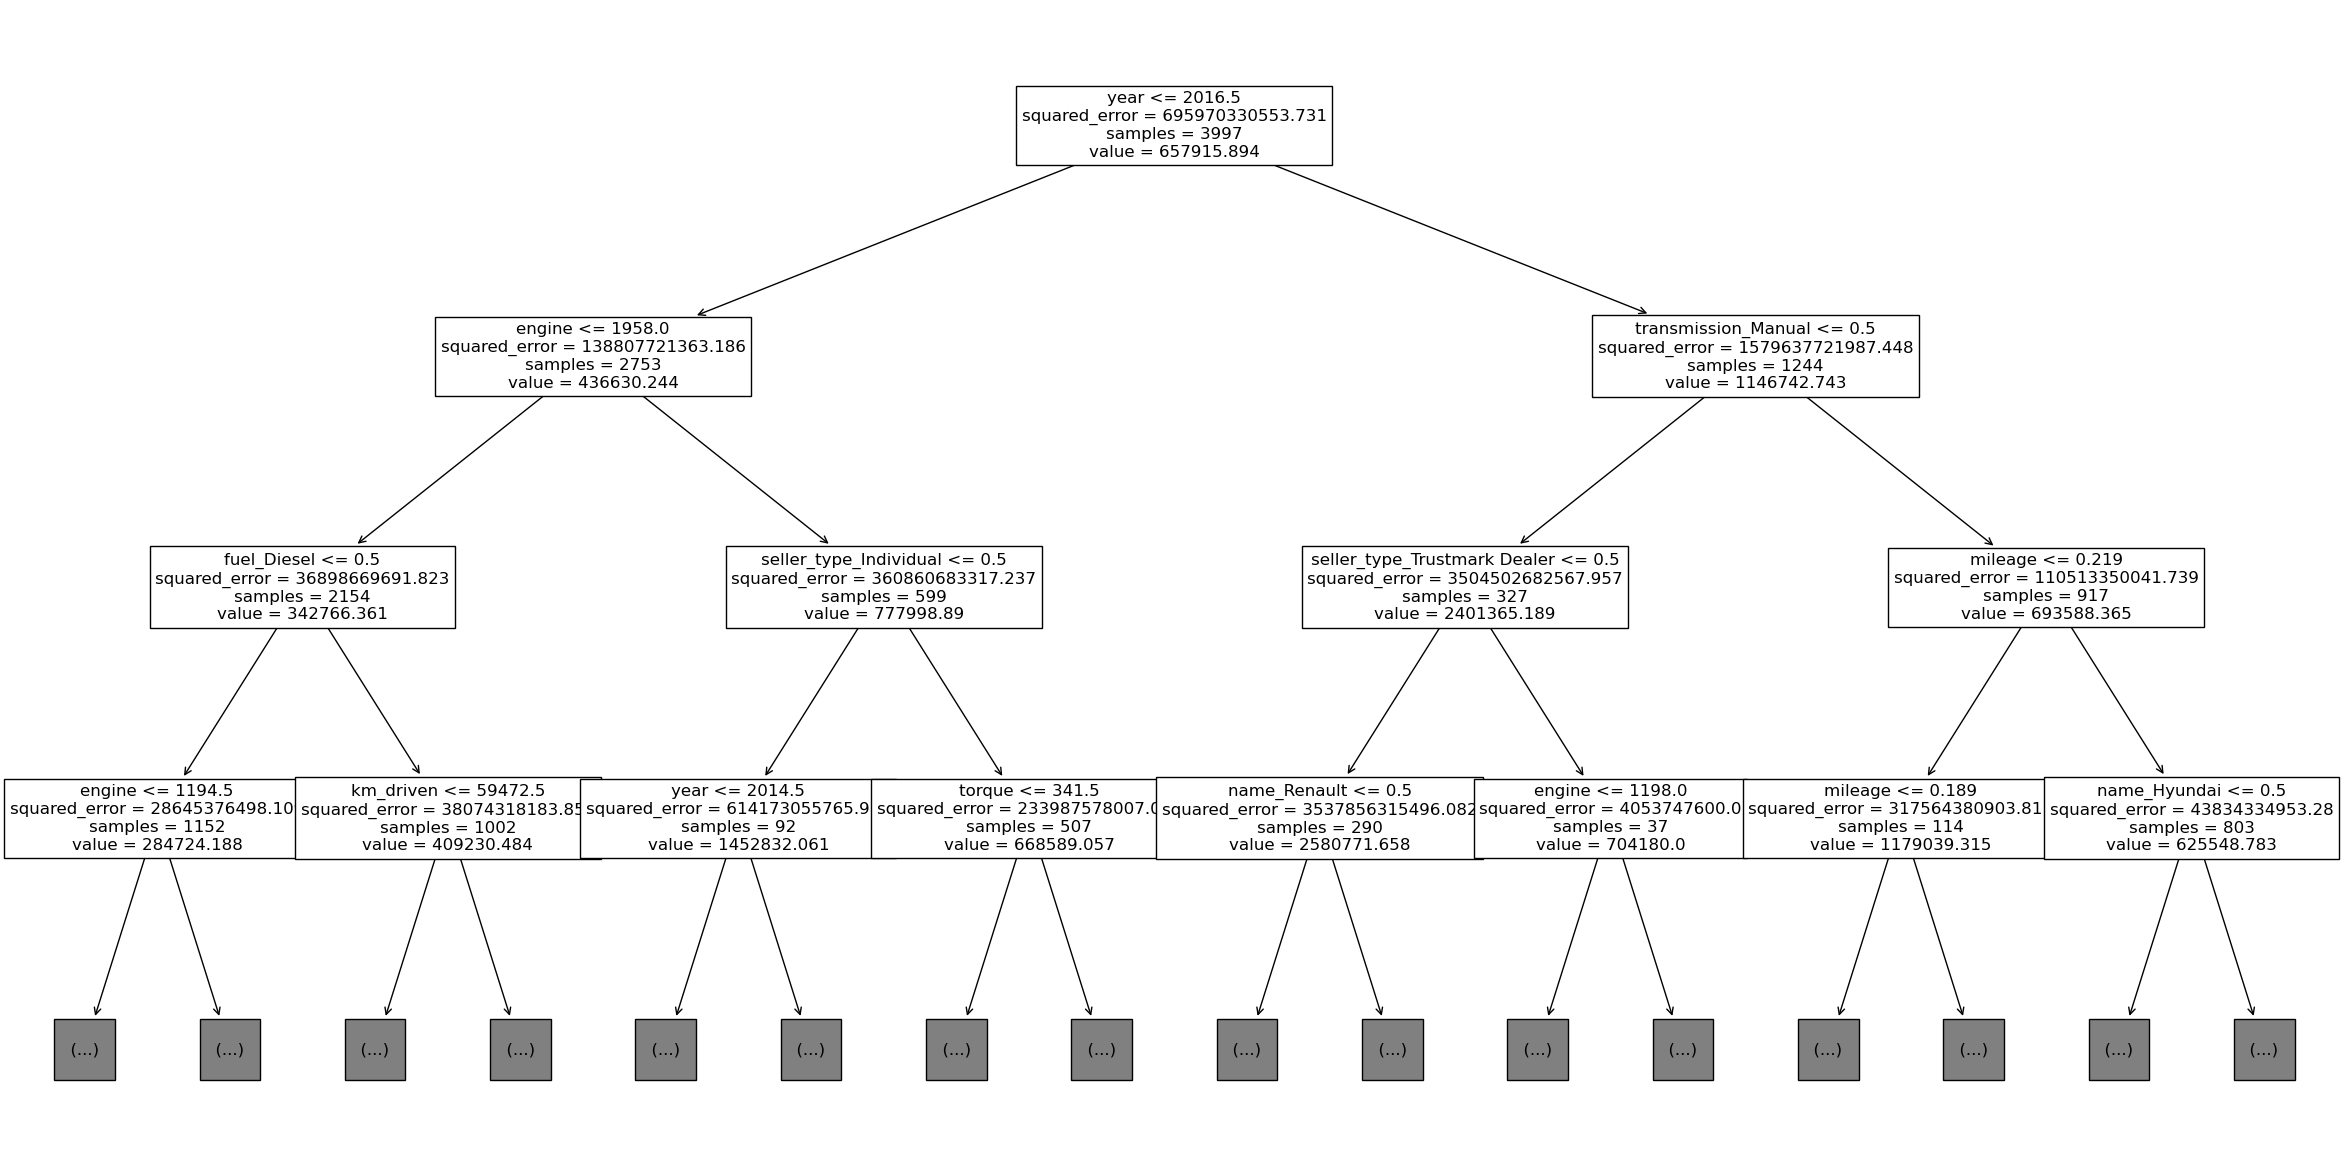

In [390]:
plt.figure(figsize=(30, 15))
plot_tree(rf.estimators_[20], max_depth=3, fontsize=12 , feature_names=X_train.columns)
plt.show()

In [391]:
train_RMSE_list = list()
test_RMSE_list = list()

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_cv = RandomForestRegressor(random_state=100, max_features='sqrt', max_depth=10, n_estimators=300, min_samples_split=3)
    rf_cv.fit(X_train, y_train)
    
    train_pred = rf_cv.predict(X_train)
    test_pred = rf_cv.predict(X_test)


    train_RMSE = mean_squared_error(y_train, train_pred, squared=False)
    test_RMSE = mean_squared_error(y_test, test_pred, squared=False)

    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)
print('train RMSE : ', train_RMSE_list)
print('test RMSE : ', test_RMSE_list)

c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the func

train RMSE :  [124632.41617793584, 126005.36677204072, 126866.02443707584, 127319.3785761062, 125305.25791823899]
test RMSE :  [213708.81312890488, 165408.209548178, 136093.4056284908, 224185.46753901837, 171128.59368133201]


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
